## 1. Introduction

The modern Olympic Games are leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are held every four years, with the Summer and Winter Games alternating by occurring every four years but two years apart.

Their creation was inspired by the ancient Olympic Games, which can be traced back to 776 BC. They were dedicated to the Olympian gods and were staged on the ancient plains of Olympia. They continued for nearly 12 centuries, until Emperor Theodosius decreed in 393 A.D. that all such "pagan cults" be banned.

In this kernel, my goal is to show how the Olympic Games have developed over the years, changing participation trends, effects of major geopolitical events, most popular sports, uncommon events that occured, et al.

The data was scrapped by [**Randi H Griffin**](https://www.kaggle.com/heesoo37) from www.sports-reference.com and can be found [here](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/home)

## 2. Preparation

### 2.1 Importing modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("input"))

plt.style.use('ggplot')
%matplotlib inline

['athlete_events.csv', 'noc_regions.csv']


In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


### 2.2 Importing files

In [3]:
PATH = 'input/'
events = pd.read_csv(f'{PATH}athlete_events.csv')
regions = pd.read_csv(f'{PATH}noc_regions.csv')

### 2.3 Basic Exploration

In [4]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Let's join both the tables on the 'NOC' column.

In [6]:
data = pd.merge(events, regions, how='left', on='NOC')
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

Let's look at missing values in the dataset.

In [7]:
data.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

In [8]:
data[data.region.isnull() == True].Team.unique()

array(['Singapore', 'Refugee Olympic Athletes', 'June Climene', 'Unknown',
       'Tuvalu', 'Rika II', 'Singapore-2', 'Singapore-1'], dtype=object)

Let's fill up the region column of teams with 'Singapore', 'Singapore-2' and 'Singapore-1' names as 'Singapore'. Also, fill up values for 'Tuvalu'

In [9]:
data.loc[(data.Team == 'Singapore') | (data.Team == 'Singapore-1') | (data.Team =='Singapore-2'), 'region'] = 'Singapore'
data.loc[(data.Team == 'Tuvalu'), 'region'] = 'Tuvalu'

In [10]:
data[data.region.isnull() == True].Team.value_counts()

Refugee Olympic Athletes    12
Rika II                      4
June Climene                 3
Unknown                      2
Name: Team, dtype: int64

Let's leave these as Unknown for region column as I'm not sure what country to put them in. (Even after thorough data exploration)

In [11]:
print(data.Age.isnull().sum())
print(data.Height.isnull().sum())
print(data.Weight.isnull().sum())

9474
60171
62875


There are so many missing values for 'Age', 'Height' and 'Weight' categories that we can't do anything but ignore them during our analysis. Also, assuming that the null values for the Medal column corresponds to Olympians who didn't win a medal, let's fill the NaN values for Medal to 'None'.

In [12]:
data.loc[data.Medal.isna(), 'Medal'] = 'None'

## 3. Participation statistics

### 3.1 Number of participating countries over years

In [13]:
len(data.region.unique())

208

So, we have 208 unique countries that have participated in the Olympics over the years. 

In [14]:
data.groupby(['Year','Season']).Season.count()

Year  Season
1896  Summer      380
1900  Summer     1936
1904  Summer     1301
1906  Summer     1733
1908  Summer     3101
1912  Summer     4040
1920  Summer     4292
1924  Summer     5233
      Winter      460
1928  Summer     4992
      Winter      582
1932  Summer     2969
      Winter      352
1936  Summer     6506
      Winter      895
1948  Summer     6405
      Winter     1075
1952  Summer     8270
      Winter     1088
1956  Summer     5127
      Winter     1307
1960  Summer     8119
      Winter     1116
1964  Summer     7702
      Winter     1778
1968  Summer     8588
      Winter     1891
1972  Summer    10304
      Winter     1655
1976  Summer     8641
      Winter     1861
1980  Summer     7191
      Winter     1746
1984  Summer     9454
      Winter     2134
1988  Summer    12037
      Winter     2639
1992  Summer    12977
      Winter     3436
1994  Winter     3160
1996  Summer    13780
1998  Winter     3605
2000  Summer    13821
2002  Winter     4109
2004  Summer    134

This shows that there is a disparity in how the summer and winter olympics were held in the same year before 1994, when they were separated to take place in gaps of 2 years. Let's separate the data according to seasons for further analysis.

In [15]:
summer_data = data[data.Season == 'Summer']
winter_data = data[data.Season == 'Winter']

Let's see the number of nations participating in the games in different seasons.

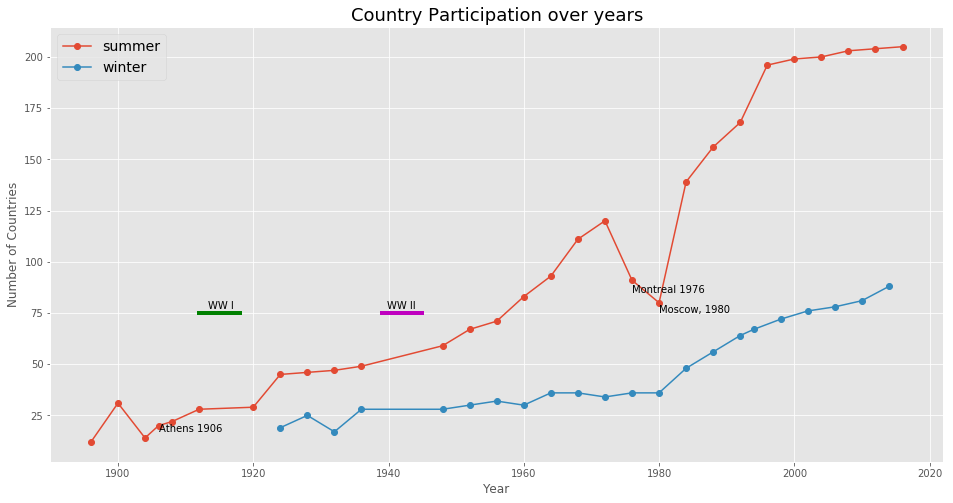

In [16]:
summer_data.groupby('Year').region.nunique().plot.line(figsize=(16,8), label = 'summer', marker = 'o')
winter_data.groupby('Year').region.nunique().plot.line(figsize=(16,8), label = 'winter', marker = 'o')
plt.title('Country Participation over years', fontsize=18)
plt.legend(loc='best',fontsize=14)
plt.ylabel('Number of Countries')
plt.text(1980,75,'Moscow, 1980')
plt.text(1976,85,'Montreal 1976')
plt.text(1906,17,'Athens 1906')
plt.text(1913.25, 77,'WW I')
plt.text(1939.75,77,'WW II')
plt.plot([1912,1918],[75,75],c='g',linewidth=4)
plt.plot([1939,1945],[75,75],c='m',linewidth=4)

The above figure has some interesting aspects. Let's look into the reasons for these events:
 - **Athens, 1906**: The 1906  Intercalated Games or 1906 Olympic Games was an international multi-sport event that was celebrated in Athens, Greece. Whilst medals were distributed to the participants during these games, the medals are not officially recognized by the IOC today.
 - **WW I**: No games were held in 1916 due WW I spanning from 1912-1920.
 - **WW II**: There was a twelve year hiatus (1936-1948), in which no Olympics were held due to WW II
 - **Montreal, 1976**: International politics played a part leading to low attendance due to boycott by 25 African Nations. They were all protesting New Zealand's sporting links with South Africa.
 - **Moscow, 1980**: International politics again played a part, as 66 nations refused to send teams to Moscow, protesting Soviet Invasion of Afghanistan.

### 3.2 Number of athletes participating over the years

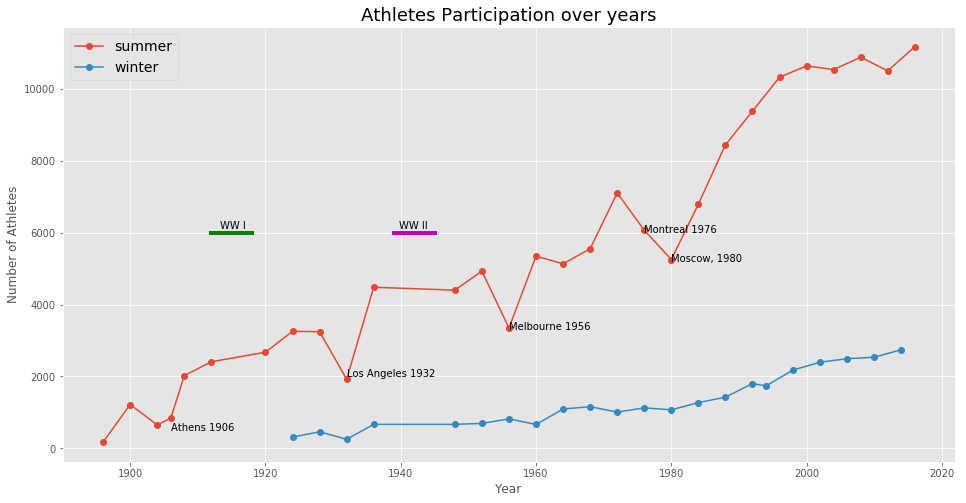

In [17]:
summer_data.groupby('Year').Name.nunique().plot.line(figsize=(16,8), label = 'summer', marker = 'o')
winter_data.groupby('Year').Name.nunique().plot.line(figsize=(16,8), label = 'winter', marker = 'o')
plt.title('Athletes Participation over years', fontsize=18)
plt.legend(loc='best',fontsize=14)
plt.ylabel('Number of Athletes')
plt.text(1980,5200,'Moscow, 1980')
plt.text(1976,6000,'Montreal 1976')
plt.text(1906,500,'Athens 1906')
plt.text(1932,2000,'Los Angeles 1932')
plt.text(1956,3300,'Melbourne 1956')
plt.text(1913.25, 6100,'WW I')
plt.text(1939.75,6100,'WW II')
plt.plot([1912,1918],[6000,6000],c='g',linewidth=4)
plt.plot([1939,1945],[6000,6000],c='m',linewidth=4)

We see some new characteristics in this figure. Let's look into them:
 - **Los Angeles 1932**: The Games were held during the worldwide Great Depression and many nations and athletes were unable to pay for the trip to Los Angeles; fewer than half the number of participants in the 1928 Summer Olympics in Amsterdam returned to compete in 1932.
 - **Melbourne 1956**: A number of International events played a part. Egypt, Iraq, and Lebanon announced that they would not participate in the Olympics in response to the Suez Crisis when Egypt was invaded by Israel, the United Kingdom, and France after Egypt nationalised the Suez canal. Meanwhile, in 1956 the Soviet Union crushed the Hungarian Revolution, and the Soviet presence at the Games led to the withdrawal of the Netherlands, Cambodia, Spain, and Switzerland. Less than two weeks before the 22 November opening ceremony, the People's Republic of China chose to boycott the event because the Republic of China had been allowed to compete. Although the number of countries participating (67) was almost the same as in 1952 (69), the number of athletes competing dropped sharply.

### 3.3 Number of events over the years

Text(0,0.5,'Number of Events')

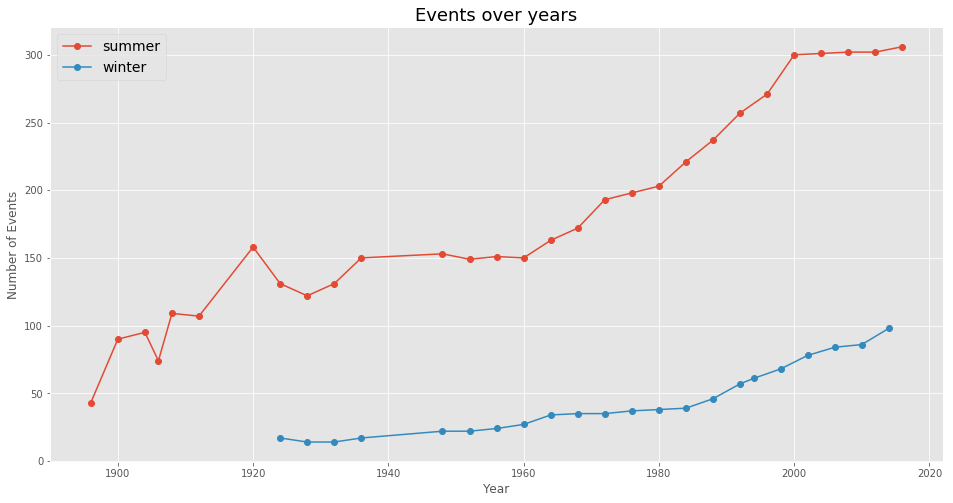

In [18]:
summer_data.groupby('Year').Event.nunique().plot.line(figsize=(16,8), label = 'summer', marker = 'o')
winter_data.groupby('Year').Event.nunique().plot.line(figsize=(16,8), label = 'winter', marker = 'o')
plt.title('Events over years', fontsize=18)
plt.legend(loc='best',fontsize=14)
plt.ylabel('Number of Events')

Features of the figure:
 - **Pre 1924**: Initially, the host countries decided the sporting schedule and hence a lot of sports such as Cricket(1900 – Paris), Croquet(1900 – Paris), Rackets(1908 – London), Tug of war(1900-1920), etc led a short life. In 1924, IOC assumed this role, hence standardizing the competetive sports.
 - **1924-2000**: A steady rise in the number of competitive games was seen from 1924 to the 2000 Olympics.
 - **Post 2000**: The growth of number of events levels off for the summer games at around 2004. This is probably due to the variety of games reaching a saturation point. (It cannot increase continuously!). 
 - **Winter vs Summer**: In all the above figures, we see that the values for winter games is comparatively lower than that of summer games. This is because of the less variety of winter games being available as well as the number of countries which participate in them being less, with the weather of Southern countries playing a part.

## 4. Characteristics of winners

### 4.1 Male winners in Summer Olympics

In [19]:
male_summer = summer_data[summer_data.Sex == 'M']

Text(0.5,1,'Height vs Weight for Gold Medalist (Men)')

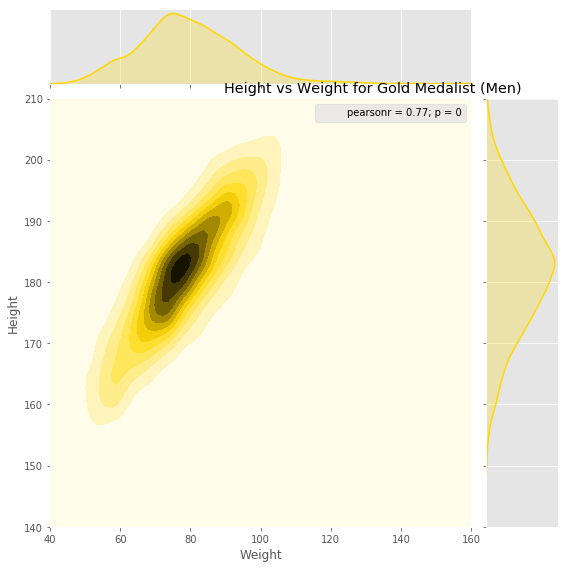

In [31]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = male_summer[male_summer.Medal == 'Gold'], color='gold',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for Gold Medalist (Men)', fontdict = {'horizontalalignment':'right'})

Text(0.5,1,'Height vs Weight for Silver Medalist (Men)')

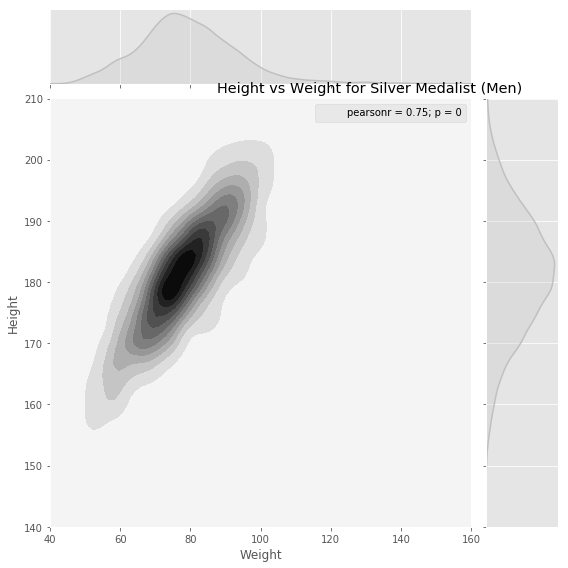

In [32]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height', 
              data = male_summer[male_summer.Medal == 'Silver'], color='silver',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for Silver Medalist (Men)', fontdict = {'horizontalalignment':'right'})

Text(0.5,1,'Height vs Weight for Bronze Medalist (Men)')

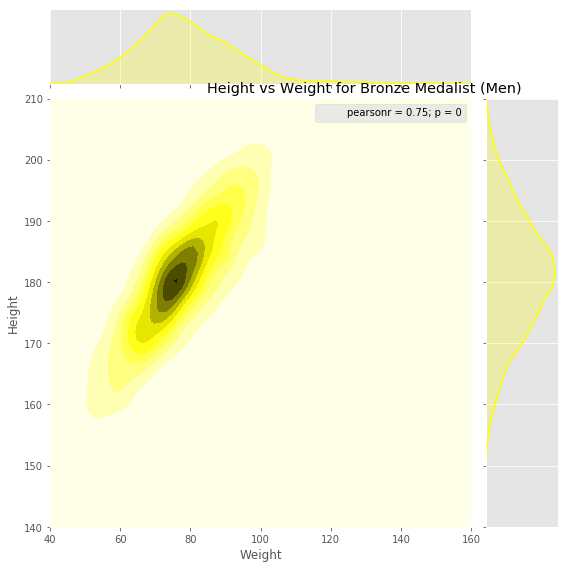

In [33]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = male_summer[male_summer.Medal == 'Bronze'], color='yellow',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for Bronze Medalist (Men)', fontdict = {'horizontalalignment':'right'})

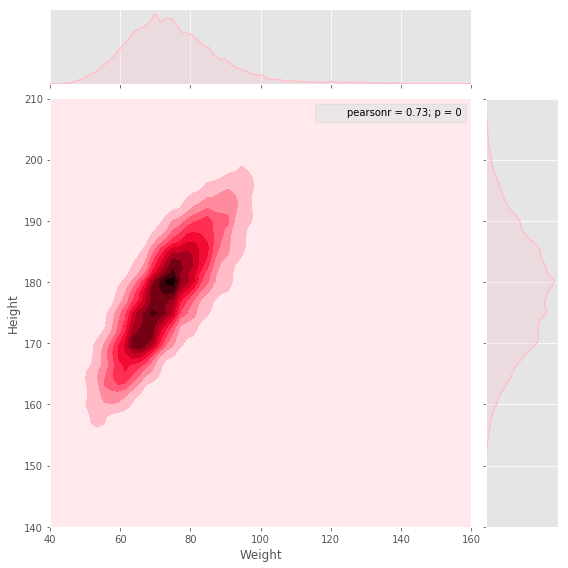

In [34]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height', 
              data = male_summer[male_summer.Medal == 'None'], color='pink',
              size = 8, xlim=(30,160), ylim=(140,210))

The above four figures indicate that there is usually a linear relationship between height and weights (Expected!), with most of the winners having around 180 cm height and 80 kg weight. But a few curious result were observed:
 - The Gold Medalist are usually taller than the Silver or Bronze medalist (Look at the center of the countour)
 - The Height of all Medal winners is distributed normally, while the weights are slightly right-skewed.
 - Athletes who did not win any medal tend to have lighter weight (Max density at around 75, less spread as well)
 
**Note**: These are all priliminary observations, a better understanding can be developed by comparing the same for individual Sport categories 

### 4.2 Female winners in Summer Olympics

In [26]:
female_summer = summer_data[summer_data.Sex == 'F']

Text(0.5,1,'Height vs Weight for Gold Medalist (Women)')

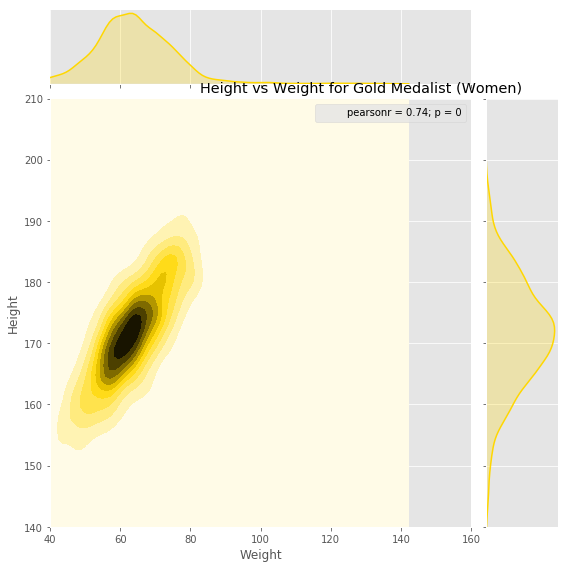

In [35]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = female_summer[female_summer.Medal == 'Gold'], color='gold',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for Gold Medalist (Women)', fontdict = {'horizontalalignment':'right'})

Text(0.5,1,'Height vs Weight for Silver Medalist (Women)')

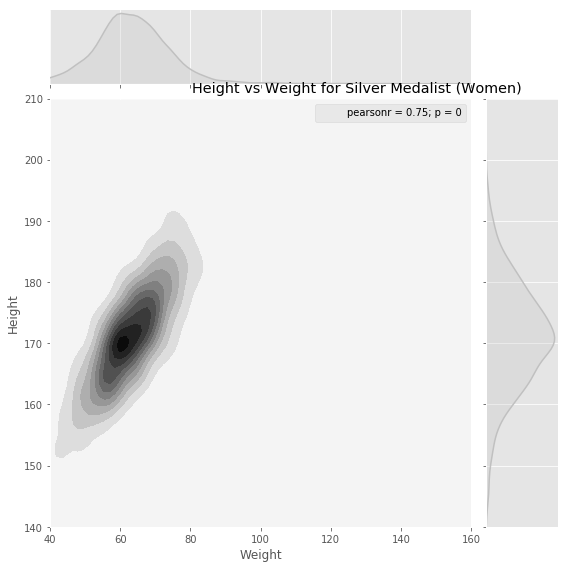

In [36]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = female_summer[female_summer.Medal == 'Silver'], color='silver',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for Silver Medalist (Women)', fontdict = {'horizontalalignment':'right'})

Text(0.5,1,'Height vs Weight for Bronze Medalist (Women)')

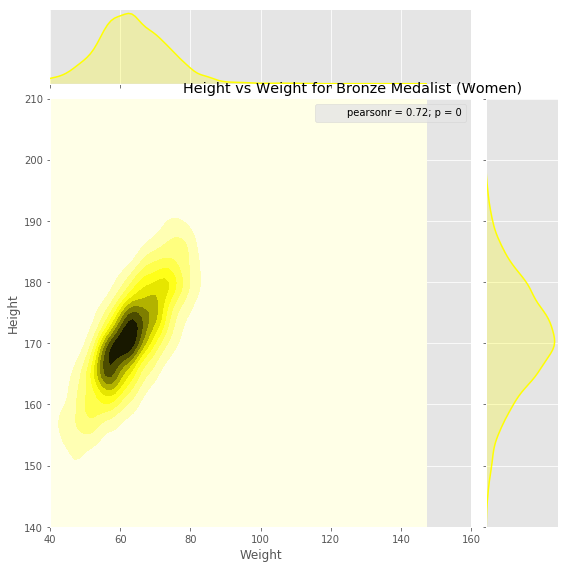

In [37]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = female_summer[female_summer.Medal == 'Bronze'], color='yellow',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for Bronze Medalist (Women)', fontdict = {'horizontalalignment':'right'})

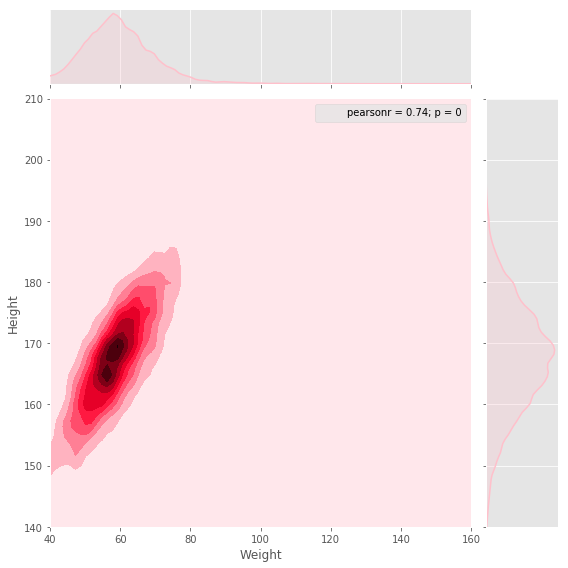

In [38]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = female_summer[female_summer.Medal == 'None'], color='pink',
              size = 8, xlim=(30,160), ylim=(140,210))